In [1]:
from sqlalchemy import create_engine, MetaData, Table
from sqlalchemy.orm import sessionmaker
from urllib.parse import quote

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Załadowanie bazy danych

In [2]:
username = 'team25'
password = quote('te@mzs')
database = 'team25'
host = 'giniewicz.it'
port = '3306'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

metadata = MetaData()
games_for_sale = Table('games_for_sale', metadata, autoload_with = engine)
games_to_rent = Table('games_to_rent', metadata, autoload_with = engine)
customers = Table('customers', metadata, autoload_with = engine)
staff = Table('staff', metadata, autoload_with = engine)
sale = Table('sale', metadata, autoload_with = engine)
rental = Table('rental', metadata, autoload_with = engine)
competition = Table('competition', metadata, autoload_with = engine)
competition_results = Table('competition_results', metadata, autoload_with = engine)

connection = engine.connect()

In [3]:
"""Funkcja łącząca dwie tabele po podanych kluczach"""
def join_tables(table1, table2, key1, key2):
#     key1, key2 = string(key1), string(key2)
    Session = sessionmaker(bind = engine)
    session = Session()
    query = session.query(table1, table2).filter(getattr(table1.c, key1) == getattr(table2.c, key2)).all()
    column_names = query[0].keys()
    df = pd.DataFrame(query, columns = column_names)
    return df

In [4]:
def join_3tables(table1, table2, table3, key1, key2, key3, key4):
    Session = sessionmaker(bind = engine)
    session = Session()
    query = session.query(table1, table2, table3).filter(getattr(table1.c, 
            key1) == getattr(table2.c, key2)).filter(getattr(table1.c, key3) == getattr(table3.c, key4)).all()
    column_names = query[0].keys()
    df = pd.DataFrame(query, columns = column_names)
    return df

## Problem 1 - ranking na pracownika miesiąca

Pracownika miesiąca można rozumieć jako:
* tego co sprzedał/wypożyczył największą ilość gier
* tego co osiągnął największy przychód z gier

In [141]:
def month_ranking_example(df, year = 2023, month = 5):
    df = df[df.month == month][df.year == year][:5].sort_values(by = 'count', ascending = True)
    return df

### Ranking na największą ilość sprzedanych gier

In [142]:
sql = """SELECT MONTH(date) AS month,
        YEAR(date) AS year,
        CONCAT(first_name, ' ', last_name) AS full_name,
        COUNT(*) AS count
FROM sale
JOIN staff
USING (staff_id)
GROUP BY year, month, full_name
"""
df = query_to_df(sql)

In [192]:
df1 = month_ranking_example(df, year = 2023, month = 5)
df2 = month_ranking_example(df, year = 2023, month = 4)
df3 = month_ranking_example(df, year = 2023, month = 3)
df4 = month_ranking_example(df, year = 2023, month = 2)
df5 = month_ranking_example(df, year = 2023, month = 1)
df6 = month_ranking_example(df, year = 2022, month = 12)
df1['full_name'].values

array(['Bartosz Hetman', 'Filip Pawlaczyk', 'Antonina Hemmerling',
       'Aleksander Szymaszczyk', 'Aleksander Magdaleński'], dtype=object)

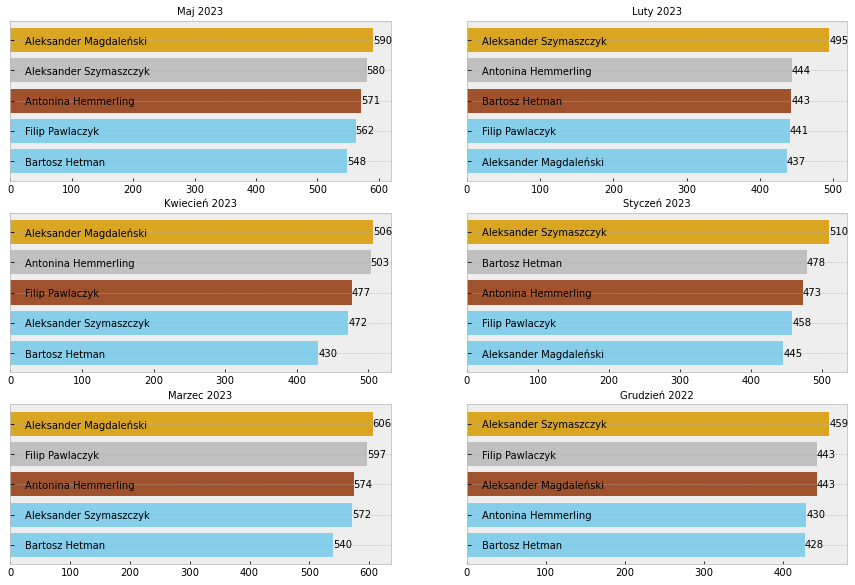

In [193]:
month_names = {1 : 'Styczeń',
                  2 : 'Luty',
                  3 : 'Marzec',
                  4 : 'Kwiecień',
                  5 : 'Maj',
                  6 : 'Czerwiec',
                  7 : 'Lipiec',
                  8 : 'Sierpień',
                  9 : 'Wrzesień', 
                  10 : 'Październik',
                  11 : 'Listopad', 
                  12 : 'Grudzień'}

plt.style.use('bmh')
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
ax[0, 0].barh(df1['full_name'], df1['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])
ax[1, 0].barh(df2['full_name'], df2['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])
ax[2, 0].barh(df3['full_name'], df3['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])
ax[0, 1].barh(df4['full_name'], df4['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])
ax[1, 1].barh(df5['full_name'], df5['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])
ax[2, 1].barh(df6['full_name'], df6['count'], color = ['skyblue', 'skyblue', 'sienna', 'silver', 'goldenrod'])

ax[0, 0].bar_label(ax[0, 0].containers[0], fmt= '%i', label_type='edge')
ax[0, 0].tick_params(axis='y', direction='in',pad=-15)
ax[0, 0].set_yticklabels(df1['full_name'], horizontalalignment = "left")
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt= '%i', label_type='edge')
ax[1, 0].tick_params(axis='y', direction='in',pad=-15)
ax[1, 0].set_yticklabels(df2['full_name'], horizontalalignment = "left")
ax[2, 0].bar_label(ax[2, 0].containers[0], fmt= '%i', label_type='edge')
ax[2, 0].tick_params(axis='y', direction='in',pad=-15)
ax[2, 0].set_yticklabels(df3['full_name'], horizontalalignment = "left")
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt= '%i', label_type='edge')
ax[0, 1].tick_params(axis='y', direction='in',pad=-15)
ax[0, 1].set_yticklabels(df4['full_name'], horizontalalignment = "left")
ax[1, 1].bar_label(ax[1, 1].containers[0], fmt= '%i', label_type='edge')
ax[1, 1].tick_params(axis='y', direction='in',pad=-15)
ax[1, 1].set_yticklabels(df5['full_name'], horizontalalignment = "left")
ax[2, 1].bar_label(ax[2, 1].containers[0], fmt= '%i', label_type='edge')
ax[2, 1].tick_params(axis='y', direction='in',pad=-15)
ax[2, 1].set_yticklabels(df6['full_name'], horizontalalignment = "left")

ax[0, 0].set_title(month_names[df1.month.values[0]] + ' ' + str(df1.year.values[0]), size = 10)
ax[1, 0].set_title(month_names[df2.month.values[0]] + ' ' + str(df2.year.values[0]), size = 10)
ax[2, 0].set_title(month_names[df3.month.values[0]] + ' ' + str(df3.year.values[0]), size = 10)
ax[0, 1].set_title(month_names[df4.month.values[0]] + ' ' + str(df4.year.values[0]), size = 10)
ax[1, 1].set_title(month_names[df5.month.values[0]] + ' ' + str(df5.year.values[0]), size = 10)
ax[2, 1].set_title(month_names[df6.month.values[0]] + ' ' + str(df6.year.values[0]), size = 10)
plt.show()

## Problem 2 - top 10 zawodników turniejowych

In [218]:
sql = """
SELECT CONCAT(first_name, ' ', last_name) AS full_name,
        SUM(4 - place) AS points
FROM competition_results
JOIN customers 
USING (customer_id)
WHERE place <= 3
GROUP BY full_name
ORDER BY points DESC"""
df2 = query_to_df(sql)
df2 = df2.set_index('full_name')
df2.insert(1, 'place', [(i + 1) for i in range(np.shape(df2)[0])])
d = df2['points'].value_counts()
dups = d.where(d > 1).dropna().index.values
for dup in dups:
    df2['place'].mask(df2['points'] == dup, df2[df2['points'] == dup].place.values.min(), inplace = True)
places = np.array(df2.place.values)
unq = np.unique(places)
new_places = np.array([i + 1 for i in range(len(unq))])
replace_dict = dict(zip(unq, new_places))
for key, value in replace_dict.items():
    places[places == key] = value
df2['place'] = places

df2 = df2[df2.place <= 10]
df2

,points,place
full_name,,
Hanna Jabłońska,33,1
Krzysztof Chrościcki,31,2
Yana Onyszczak,29,3
Klara Dąbrowska,28,4
Samuel Januszewski,27,5
Rozalia Bilewicz,26,6
Marcelina Kempa,26,6
Pola Brózda,24,7
Anastazja Rojek,21,8


In [211]:
places = np.array(df22.place.values)
unq = np.unique(places)
len(unq)
new_places = np.array([i + 1 for i in range(len(unq))])
replace_dict = dict(zip(unq, new_places))
replace_dict
for key, value in replace_dict.items():
    places[places == key] = value
places

array([ 1,  2,  3,  4,  5,  6,  6,  7,  8,  8,  8,  8,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 13, 14, 15, 15, 15, 16, 17, 17, 18], dtype=int64)

## Problem 3 - gry najbardziej dochodowe

### Sprzedaż

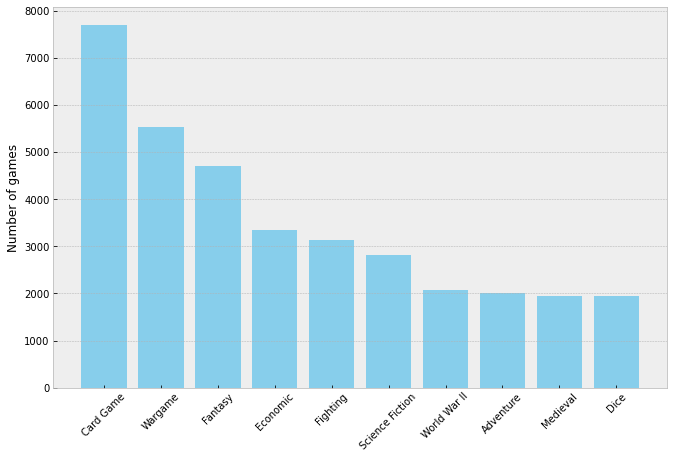

In [194]:
def best_categories(df):
    categories = df.category.values
    splitted = []
    for category in categories:
        category_split = category.split(', ')
        for indice in category_split:
            splitted.append(indice)
    splitted = np.array(splitted)
    splitted_series = pd.DataFrame(splitted)
    splitted_series.columns = ['Category']
    
    popularity = splitted_series.value_counts().reset_index()
    popularity.columns = ['Category', 'Count']
    first10 = popularity[:10]
    
    plt.style.use('bmh')
    fig, ax = plt.subplots(figsize = (11, 7))
    ax.bar(first10['Category'], first10['Count'], color = 'skyblue')
    ax.set_xticklabels(first10['Category'], rotation = 45)
    ax.set_ylabel('Number of games')
    plt.show()
    
    
    
    
sql = """SELECT category 
FROM games_for_sale 
JOIN sale 
USING (game_id)
WHERE MONTH(date) >= 3 AND YEAR(date) = 2023"""

df4_sale = query_to_df(sql)
ctgr_sale = best_categories(df4_sale)
ctgr_sale

In [16]:
df3_sale = join_tables(games_for_sale, sale, 'game_id', 'game_id')
df3_sale = df3_sale.loc[:, ~df3_sale.columns.duplicated()]
df3_sale = df3_sale[['name', 'amount', 'date']]
df3_sale.head()

,name,amount,date
0,Samara,67.40,2021-06-02
1,Fleet Commander: Nimitz,424.80,2021-06-02
2,Fire in the East,938.40,2021-06-02
3,WildLife,112.78,2021-06-02
4,Barcelona: The Rose of Fire,199.80,2021-06-04


In [17]:
best5 = df3_sale.groupby('name').sum().sort_values(by = 'amount', ascending = False)[:5]
best5

,amount
name,
Case Blue,124052.00
Tales of the Arabian Nights,106507.84
Warhammer Quest: Shadows Over Hammerhal,93229.32
Titan,92631.00
Space Hulk (fourth edition),80780.05


In [18]:
best5_timelapse = df3_sale[df3_sale.name.isin(best5.index) == True]
best5_timelapse = best5_timelapse.groupby(['name', 'date']).sum()
best5_timelapse

amount
name                                    date               
Case Blue                               2021-09-23  3448.00
                                        2021-09-28  3442.00
                                        2021-10-08  3441.00
                                        2021-10-26  6891.00
                                        2021-12-28  3442.00
...                                                     ...
Warhammer Quest: Shadows Over Hammerhal 2023-02-22  3326.69
                                        2023-04-03  3329.69
                                        2023-04-11  3328.69
                                        2023-04-18  3327.69
                                        2023-05-04  3325.69

[177 rows x 1 columns]

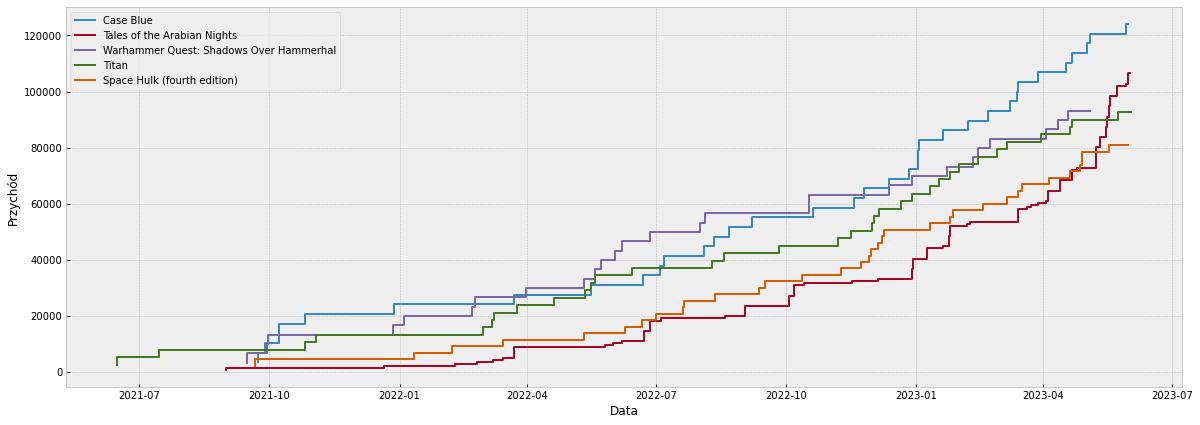

In [19]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (20, 7))
for game in best5.index:
    subgame = best5_timelapse.xs(game, level = 'name').cumsum()
    ax.step(subgame.index, subgame.amount, label = game)
ax.set_xlabel('Data')
ax.set_ylabel('Przychód')
ax.legend()
plt.show()

### Wynajem

In [20]:
df3_rent = join_3tables(games_to_rent, games_for_sale, rental, 'game_id', 'game_id', 'item_id', 'item_id')
df3_rent = df3_rent.loc[:, ~df3_rent.columns.duplicated()]
df3_rent = df3_rent[['name', 'rent_price', 'rental_date', 'return_date']]
df3_rent.head()

,name,rent_price,rental_date,return_date
0,Citadels,2,2021-06-08,2021-06-09
1,Rivet Wars: Eastern Front,5,2021-06-09,2021-06-13
2,Merkator,5,2021-06-11,2021-06-19
3,Band of Brothers: Screaming Eagles,5,2021-06-11,2021-06-12
4,Merchants & Marauders,5,2021-06-14,2021-06-17


In [21]:
df3_rent['days'] = (df3_rent['return_date'] - df3_rent['rental_date']).dt.days
df3_rent['income'] = df3_rent['rent_price']*df3_rent['days']
df3_rent = df3_rent.drop(['rent_price', 'rental_date', 'days'], axis = 1)
df3_rent.head()

,name,return_date,income
0,Citadels,2021-06-09,2
1,Rivet Wars: Eastern Front,2021-06-13,20
2,Merkator,2021-06-19,40
3,Band of Brothers: Screaming Eagles,2021-06-12,5
4,Merchants & Marauders,2021-06-17,15


In [22]:
best5_rent = df3_rent.groupby('name').sum().sort_values(by = 'income', ascending = False)[:5]
best5_rent

,income
name,
Mombasa,3850
Space Hulk (third edition),2700
War of the Ring (Second Edition),2450
Ninjato,2400
Orléans,2375


In [23]:
best5_rent_timelapse = df3_rent[df3_rent.name.isin(best5_rent.index) == True]
best5_rent_timelapse = best5_rent_timelapse.groupby(['name', 'return_date']).sum()
best5_rent_timelapse

income
name                             return_date        
Mombasa                          2021-08-07       10
                                 2021-08-09       30
                                 2021-08-30       30
                                 2021-09-25       30
                                 2021-09-30       30
...                                              ...
War of the Ring (Second Edition) 2023-05-25       30
                                 2023-05-29       90
                                 2023-06-01       30
                                 2023-06-04       20
                                 2023-06-05       30

[498 rows x 1 columns]

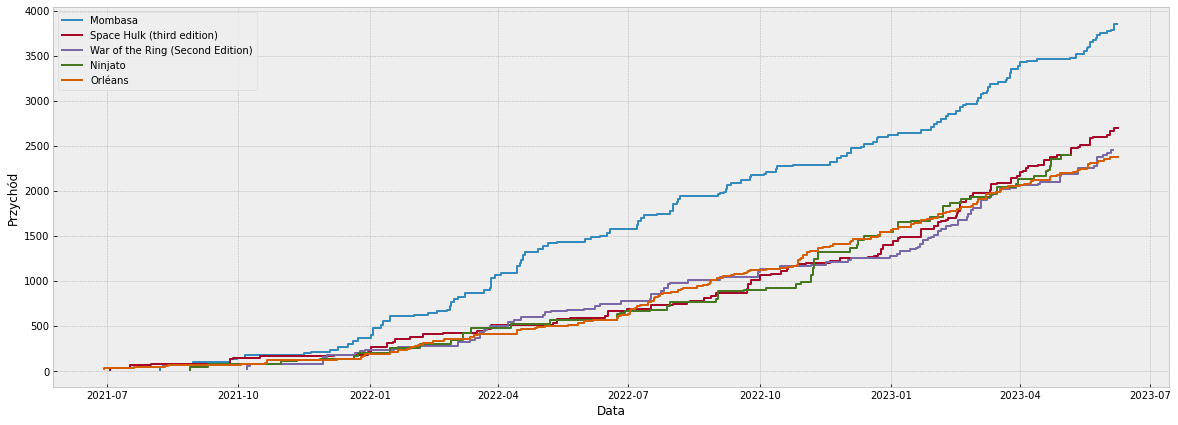

In [24]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (20, 7))
for game in best5_rent.index:
    subgame = best5_rent_timelapse.xs(game, level = 'name').cumsum()
    ax.step(subgame.index, subgame.income, label = game)
ax.set_xlabel('Data')
ax.set_ylabel('Przychód')
ax.legend()
plt.show()

## Problem 4 - najpopularniejsze kategorie

In [45]:
def best_categories(df): # podać dataframe z kolumną category
    categories = df.category.values
    splitted = []
    for category in categories:
        category_split = category.split(', ')
        for indice in category_split:
            splitted.append(indice)
    splitted = np.array(splitted)
    splitted_series = pd.DataFrame(splitted)
    splitted_series.columns = ['Category']
    
    popularity = splitted_series.value_counts().reset_index()
    popularity.columns = ['Category', 'Count']
    first10 = popularity[:10]
    plt.style.use('bmh')
    fig, ax = plt.subplots(figsize = (12, 5))
    ax.bar(first10['Category'], first10['Count'],
          color = 'skyblue')
    ax.set_xticklabels(first10['Category'], rotation = 45)
    ax.set_ylabel('Number of games')
    plt.show()

In [41]:
df4 = join_tables(games_for_sale, sale, 'game_id', 'game_id')
df4 = df4.loc[:, ~df4.columns.duplicated()][['category']]
df4.head()

,category
0,"City Building, Medieval"
1,"Nautical, Wargame, World War II"
2,"Wargame, World War II"
3,"Animals, Prehistoric"
4,City Building


In [42]:
df44 = query_to_df('select category from games_for_sale join sale using(game_id)')
df44

,category
0,"City Building, Medieval"
1,"Nautical, Wargame, World War II"
2,"Wargame, World War II"
3,"Animals, Prehistoric"
4,City Building
...,...
117805,Card Game
117806,"Economic, Science Fiction"
117807,"Card Game, City Building"
117808,"Card Game, Dice, Medieval"


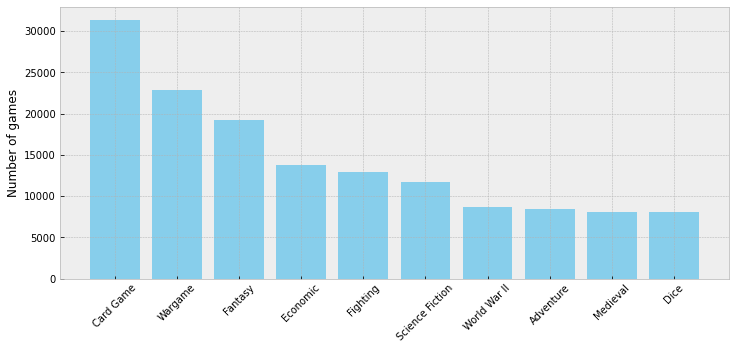

In [46]:
ctgr = best_categories(df4)
ctgr

## Problem 5 - analiza sprzedaży + predykcja

In [77]:
sql = """
SELECT SUM(amount) as amount, date, YEAR(date) AS year, MONTH(date) AS month
FROM games_for_sale
JOIN sale
USING (game_id)
GROUP BY date"""
df5 = query_to_df(sql)
df5 = df5.set_index('date')
df5

,amount,year,month
date,,,
2021-06-02,1543.380013,2021,6
2021-06-04,717.720009,2021,6
2021-06-07,1746.839981,2021,6
2021-06-08,1629.159981,2021,6
2021-06-09,1845.199982,2021,6
...,...,...,...
2023-05-30,108028.299622,2023,5
2023-05-31,123299.749498,2023,5
2023-06-01,114563.259855,2023,6


In [85]:
sql = """SELECT SUM(amount) as amount, date, YEAR(date) AS year, MONTH(date) AS month
FROM games_for_sale
JOIN sale
USING (game_id)
GROUP BY year, month"""
df5_month = query_to_df(sql)
df5_month = df5_month.set_index('date')
df5_month

,amount,year,month
date,,,
2021-06-02,6.013447e+04,2021,6
2021-07-01,1.687247e+05,2021,7
2021-08-02,2.787789e+05,2021,8
2021-09-01,4.249819e+05,2021,9
2021-10-01,5.094156e+05,2021,10
2021-11-02,5.487582e+05,2021,11
2021-12-01,7.387291e+05,2021,12
2022-01-03,7.835895e+05,2022,1
2022-02-01,8.709928e+05,2022,2


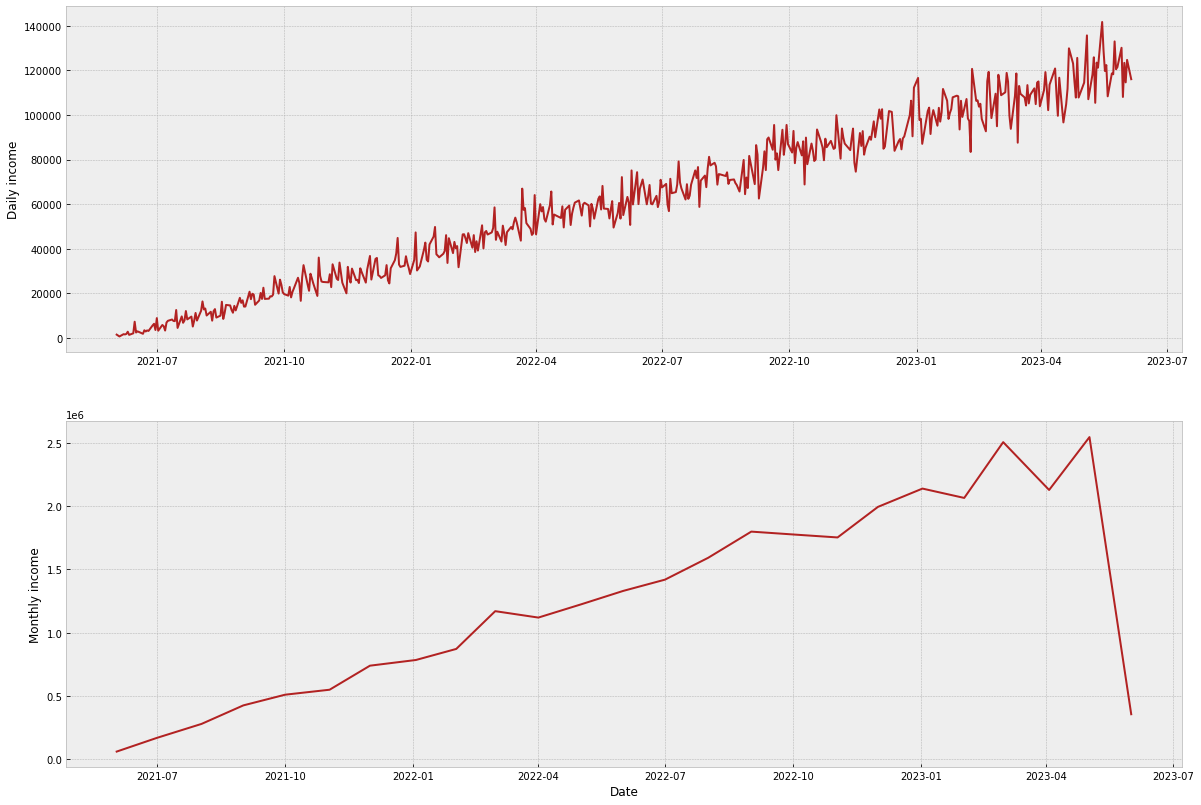

In [96]:
fig, ax = plt.subplots(2, 1, figsize = (20, 14))
ax[0].plot(df5.index, df5.amount, color = 'firebrick')
ax[1].plot(df5_month.index, df5_month.amount, color = 'firebrick')
ax[0].set_ylabel('Daily income')
ax[1].set_ylabel('Monthly income')
ax[1].set_xlabel('Date')
plt.show()

## Problem 6 - ilość gier ze względu na wiek:

In [24]:
def query_to_df(sql):
    result = connection.execute(text(sql))
    df = pd.DataFrame(result.fetchall(), columns=result.keys())
    return df

In [ ]:
# Session = sessionmaker(bind = engine)
# session = Session()
# query = session.query(games_for_sale).all()
# column_names = query[0].keys()
# df6 = pd.DataFrame(query, columns = column_names)
# df6 = df6[['age', 'availability']]
# df6 = df6.groupby('age').sum()

In [25]:
from sqlalchemy import create_engine, MetaData, Table, text
sql = """
SELECT age, SUM(availability) AS availability
FROM games_for_sale
GROUP BY age
"""
df6 = query_to_df(sql)
df6 = df6.set_index('age')
df6

,availability
age,
0,133724
2,1161
3,3228
4,29001
5,76754
6,221084
7,223203
8,2645987
9,258389


In [26]:
pegi = pd.DataFrame(index = ['Everyone', '6+', '12+', '16+', '18+'],
                    data = [sum(df6[df6.index < 6].values),
                     sum(df6.loc[(df6.index >= 6) & (df6.index < 12)].values),
                     sum(df6.loc[(df6.index >= 12) & (df6.index < 16)].values),
                     sum(df6.loc[(df6.index >= 16) & (df6.index < 18)].values),
                     sum(df6[df6.index >= 18].values)],
                   columns = ['Number of games'])
pegi

,Number of games
Everyone,243868
6+,6433401
12+,6875108
16+,87655
18+,31285


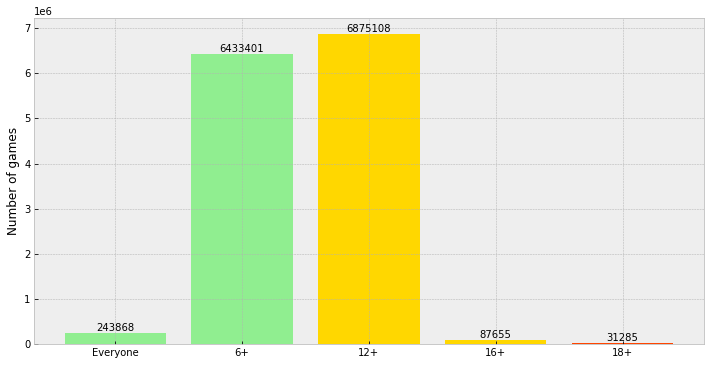

In [27]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(pegi.index, pegi['Number of games'], color = ['lightgreen', 'lightgreen', 'gold', 'gold' , 'orangered'])
ax.set_xticklabels(pegi.index)
ax.set_ylabel('Number of games')
ax.bar_label(ax.containers[0], fmt= '%i', label_type='edge')
plt.show()